OLUYORI OLUWAGBEMIGA BENJAMIN
R00224871
Python Assignment 3

In [23]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [24]:
#importing the dataset
worldo = pd.read_csv("worldometer_data.csv")
counVac = pd.read_csv("country_vaccinations.csv")

Question 1.
Create a function that will generate a stacked barplot with the following data, Total
cases, Total recovered and Total Death (in this order) for countries in a specific
continent. The continent name has to be provided by the user. Also, print the country
with most and least number of Total cases.–

In [25]:
def stack_bar_country():
    # Get continent name from user input
    cont_name = input("Please, enter one of the following continent names:\nNorth America, South America, Asia, Europe, Africa, Australia/Oceania\n\nPlease type the continent's name: ")
    try:
        # Locate the continent
        search_cont = worldo.loc[(worldo["Continent"]==cont_name)]
        # Group by country
        group_cont = search_cont.groupby("Country/Region",as_index = False)[["TotalCases","TotalRecovered","TotalDeaths"]].sum()
        # Plot stacked bar chart
        group_cont.plot(kind='bar', figsize=(27,8),stacked=True,x ='Country/Region')
        # Adding title and rotating the x-axis labels to be horizontal
        plt.title(f'Total cases, Total recovered and Total Deaths for {cont_name}')
        #plt.xticks(rotation=0, ha='center')
        maximum = group_cont[["Country/Region","TotalCases"]].max()
        minimum = group_cont[["Country/Region","TotalCases"]].min()
        print("Country with maximum number of cases is",maximum["Country/Region"])
        print("Country with the minimum number of cases is",minimum["Country/Region"])
    except:
        print("An error occurred while processing the data for the selected continent. Please make sure you entered a valid continent name.")
    

Question 2. Create a function to define the relationship between the Total Recovered and Total
Deaths of patients in a specific continent. Use the seaborn lmplot for that.–

In [26]:
def plot_reln_cont():
    # Get continent name from user input
    continent_name = input("Please, enter one of the following continent names:\nNorth America, South America, Asia, Europe, Africa, Australia/Oceania\n\nPlease type the continent's name: ")
    try:
        # Filter data for selected continent
        search_cont = worldo["Continent"] == continent_name
        subset_cont = worldo[search_cont]
        # Plot relationship between Total Recovered and Total Deaths
        sns.lmplot(x ='TotalRecovered', y ='TotalDeaths', data = subset_cont, fit_reg = True, aspect = 2)
        plt.title(f'relationship between the Total Recovered and Total Deaths of patients in {continent_name}')
    except:
        print("An error occurred while processing the data for the selected continent. Please make sure you entered a valid continent name.")


Question 3. Create a function that first prints the number of entries in the dataset for each continent. It then generates a barplot per continent containing the number of tests/1M per continent. Normalise the data before creating the barplot by dividing the total sum of tests per country in a continent by the number of countries in the continent.

In [27]:
# Create a copy of the dataset
worldo_copy = worldo.copy()

def no_of_entries():
    # Display number of entries for each continent
    print("The number of entries for each continent:\n" , worldo_copy["Continent"].value_counts())

def normalise(worldo_copy):
    # Create masks for each continent
    mask_afr = worldo_copy["Continent"]== "Africa"
    mask_as = worldo_copy["Continent"]== "Asia"
    mask_eur = worldo_copy["Continent"]== "Europe"
    mask_na = worldo_copy["Continent"]== "North America"
    mask_sa = worldo_copy["Continent"]== "South America"
    mask_ao = worldo_copy["Continent"]== "Australia/Oceania"
    # Normalize test values for each continent
    worldo_copy.loc[mask_afr, 'Tests/1M pop'] = worldo_copy['Tests/1M pop'] / len(worldo_copy[worldo_copy["Continent"]== "Africa"])
    worldo_copy.loc[mask_as, 'Tests/1M pop'] = worldo_copy['Tests/1M pop'] / len(worldo_copy[worldo_copy["Continent"]== "Asia"])
    worldo_copy.loc[mask_eur, 'Tests/1M pop'] = worldo_copy['Tests/1M pop'] / len(worldo_copy[worldo_copy["Continent"]== "Europe"])
    worldo_copy.loc[mask_na, 'Tests/1M pop'] = worldo_copy['Tests/1M pop'] / len(worldo_copy[worldo_copy["Continent"]== "North America"])
    worldo_copy.loc[mask_sa, 'Tests/1M pop'] = worldo_copy['Tests/1M pop'] / len(worldo_copy[worldo_copy["Continent"]== "South America"])
    worldo_copy.loc[mask_ao, 'Tests/1M pop'] = worldo_copy['Tests/1M pop'] / len(worldo_copy[worldo_copy["Continent"]== "Australia/Oceania"])
    return worldo_copy

def barplot():
    try:
        # Normalize test values and group by continent
        bar_d = normalise(worldo_copy).groupby("Continent")[["Tests/1M pop"]].sum()
        # Plot bar chart
        return bar_d.plot(kind='bar', figsize=(15,8), stacked=False, xlabel='Continent', ylabel='tests/1M', title='Number of tests/1M per continent')
    except:
        print("An error occurred while processing the data. Please make sure you have the necessary data and dependencies.")


Question 4. Use the second dataset to create a line plot of Daily Vaccinations on the y-axis and
date on the x-axis of a particular country. The country has to be provided by the user

In [28]:
def daily_vac():
    # Get country name from user input
    country_name = input("Please, enter one of the following country names:\nIreland, United States, India, Brazil, Japan, Australia\n\nPlease type the country's name: ")
    try:
        # Filter data for selected country
        search_cond = counVac.loc[(counVac["country"]==country_name)]
        # Plot daily vaccination data
        search_cond.plot(x ='date', y ='daily_vaccinations',linestyle = 'solid',figsize=(15,8),xlabel='Date', ylabel='Daily Vaccinations')
        plt.title(f"Line plot showing daily vaccinations in {country_name}")
    except:
        print("An error occurred while processing the data for the selected country. Please make sure you entered a valid country name.")



Question 5: Create a main() function containing a menu to run the functions, it should look like
the following example, with option 5 resulting in a thank you message being printed
before exiting the program.

Welcome to our analysis Pipeline for COVID-19 data
Please, select one of the following options:
1 - Display cases per country in a specific continent.
2 - Calculate the Recovered and Death percentages per country in a specific continent.
3 - Display number of tests per continent.
4 - Display the Daily vaccinations of a specific country.
5 - Exit.
Enter your selection: 1
Please, enter one of the following continent names:
North America, South America, Asia, Europe, Africa, Australia/Oceania

Please type the continent's name: Asia
Country with maximum number of cases is Yemen
Country with the minimum number of cases is Afghanistan


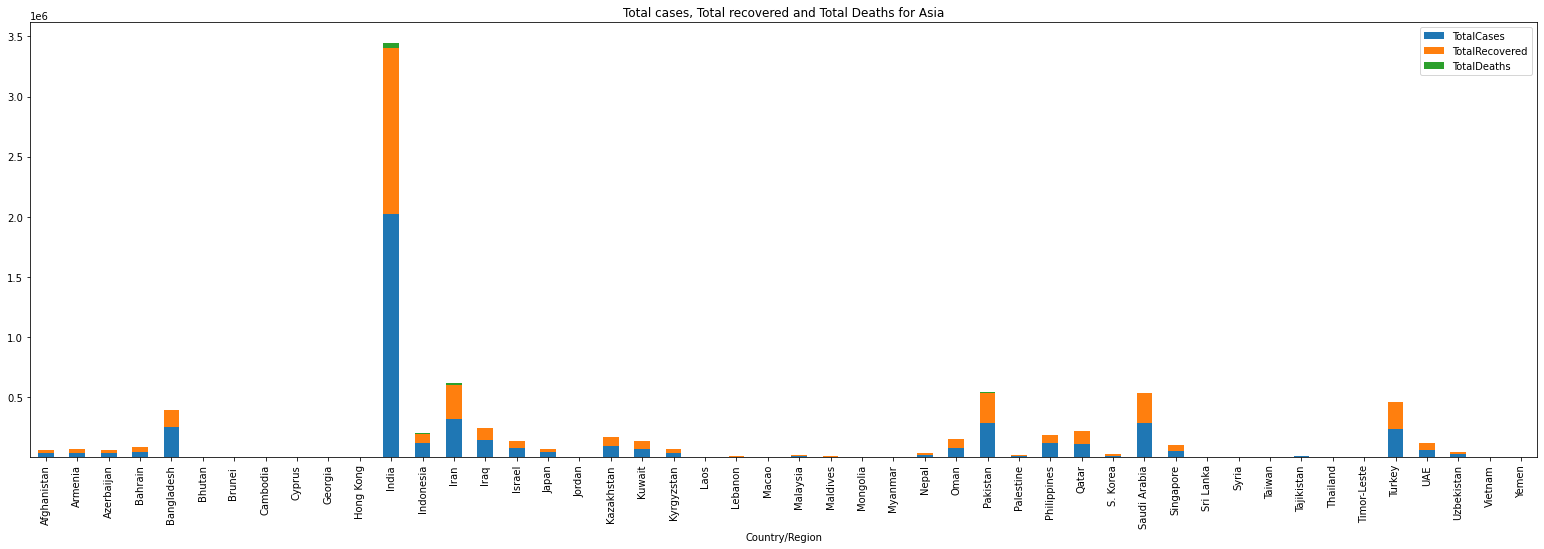

Welcome to our analysis Pipeline for COVID-19 data
Please, select one of the following options:
1 - Display cases per country in a specific continent.
2 - Calculate the Recovered and Death percentages per country in a specific continent.
3 - Display number of tests per continent.
4 - Display the Daily vaccinations of a specific country.
5 - Exit.
Enter your selection: 2
Please, enter one of the following continent names:
North America, South America, Asia, Europe, Africa, Australia/Oceania

Please type the continent's name: Africa


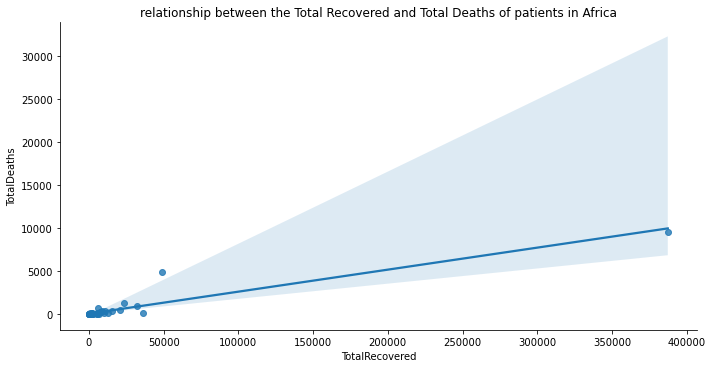

Welcome to our analysis Pipeline for COVID-19 data
Please, select one of the following options:
1 - Display cases per country in a specific continent.
2 - Calculate the Recovered and Death percentages per country in a specific continent.
3 - Display number of tests per continent.
4 - Display the Daily vaccinations of a specific country.
5 - Exit.
Enter your selection: 3
The number of entries for each continent:
 Africa               57
Asia                 48
Europe               48
North America        35
South America        14
Australia/Oceania     6
Name: Continent, dtype: int64


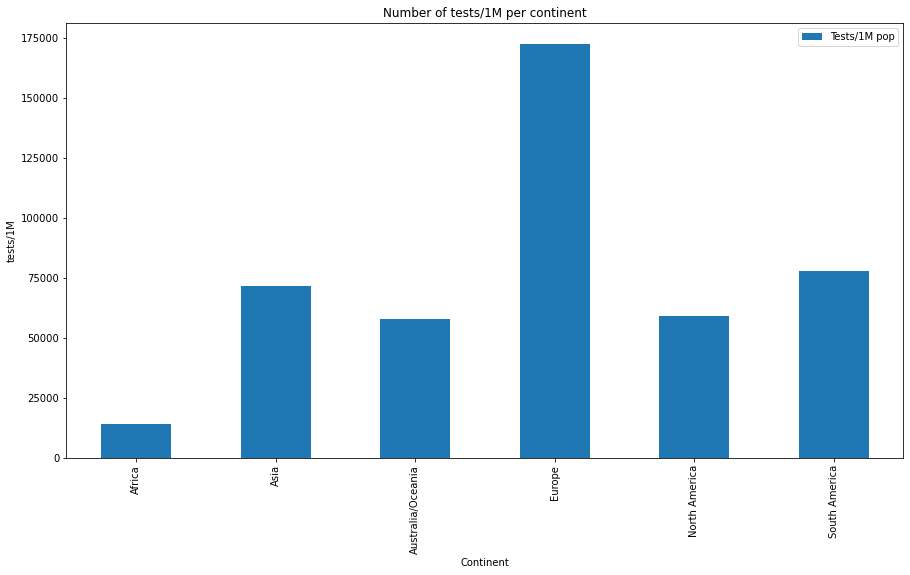

Welcome to our analysis Pipeline for COVID-19 data
Please, select one of the following options:
1 - Display cases per country in a specific continent.
2 - Calculate the Recovered and Death percentages per country in a specific continent.
3 - Display number of tests per continent.
4 - Display the Daily vaccinations of a specific country.
5 - Exit.
Enter your selection: 4
Please, enter one of the following country names:
Ireland, United States, India, Brazil, Japan, Australia

Please type the country's name: Brazil


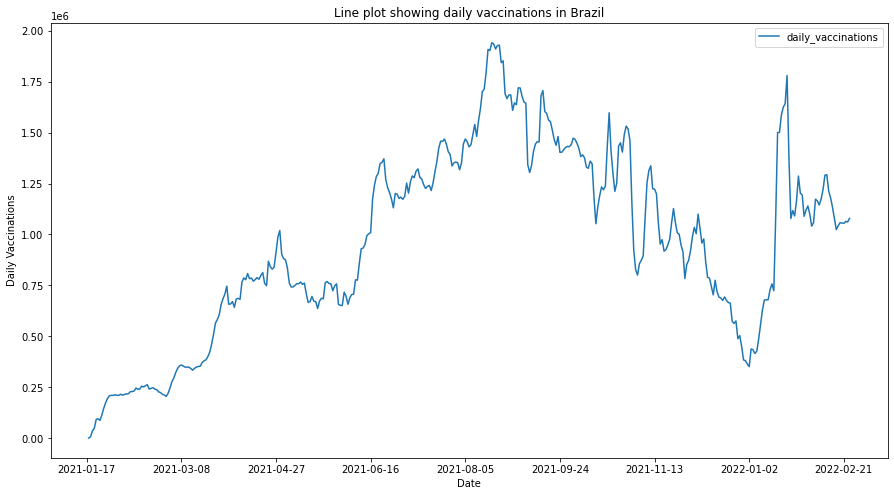

Welcome to our analysis Pipeline for COVID-19 data
Please, select one of the following options:
1 - Display cases per country in a specific continent.
2 - Calculate the Recovered and Death percentages per country in a specific continent.
3 - Display number of tests per continent.
4 - Display the Daily vaccinations of a specific country.
5 - Exit.
Enter your selection: 5
Thanks for using our application, sad to see you go


In [31]:
def main():
    while True:
        # menu options
        print("Welcome to our analysis Pipeline for COVID-19 data")
        print("Please, select one of the following options:")
        print("1 - Display cases per country in a specific continent.")
        print("2 - Calculate the Recovered and Death percentages per country in a specific continent.")
        print("3 - Display number of tests per continent.")
        print("4 - Display the Daily vaccinations of a specific country.")
        print("5 - Exit.")

        # assigning the input to an object
        selection = input("Enter your selection: ")

        # Validating the input
        if not selection.isdigit():
            print("Please enter a valid menu option (1-5)")
            main()  # call main function again
        else:
            selection = int(selection)
            if selection < 1 or selection > 5:
                print("Please enter a valid menu option (1-5)")
                main()  # call main function again
            else:
                if selection == 1:
                    stack_bar_country()
                    plt.show()
                elif selection == 2:
                    plot_reln_cont()
                    plt.show()
                elif selection == 3:
                    no_of_entries()
                    barplot()
                    plt.show()
                elif selection == 4:
                    daily_vac()
                    plt.show()
                elif selection == 5:
                    print("Thanks for using our application, sad to see you go")
                    break

main()

